# EstudioDatos

In [1]:
import pandas as pd
from collections import Counter
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import ast

pd.set_option('max_colwidth', 250)

In [2]:
data = pd.read_csv('../00_Datos/Productos_Finales/204kProducts_20190315.csv', sep = ';', index_col=False)
data.head()

C:\Users\Enric\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5,8,11,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,alternative_id,availability_date,badges,brand,category,discount,eci_provider,gtin,id,image,media,module_name,name,position,price,quantity,status,store_id,variant,vendor
0,A28233506,NaN,['express_delivery'],Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.401700e+12,1060651400131,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00160651400131____1__516x640.jpg,{'count': 1},NaN,Abrigo masculino con textura de mujer,NaN,"{'final': 199, 'currency': 'EUR'}",1,show_pdp,60,001060651400131002,NaN
1,A29054782,NaN,['express_delivery'],Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.606514e+12,1060651400180,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/06/00160651400180____1__516x640.jpg,{'count': 1},NaN,Abrigo doble faz de mujer con cinturón a tono,NaN,"{'final': 149, 'currency': 'EUR'}",1,show_pdp,60,001060651400180002,NaN
2,A27354432,NaN,['express_delivery'],Woman El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.510564e+12,1051056400107,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00151056400115____1__516x640.jpg,{'count': 1},NaN,Abrigo largo de antelina de mujer Woman El Corte Inglés,NaN,"{'final': 89.99, 'currency': 'EUR'}",1,show_pdp,60,001051056400107002,NaN
3,A28302706,NaN,['express_delivery'],Lloyd's,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.401701e+12,1019350401147,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119350401147____3__516x640.jpg,{'count': 1},NaN,Chaqueta térmica de mujer Lloyds con efecto cortavientos,NaN,"{'final': 129, 'currency': 'EUR'}",1,show_pdp,60,001019350401147002,NaN
4,A27435502,NaN,['express_delivery'],Lloyd's,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.193534e+12,1019353400229,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119353400237____2__516x640.jpg,{'count': 1},NaN,Parka 100% algodón de mujer Lloyds con capucha,NaN,"{'final': 149, 'currency': 'EUR'}",1,show_pdp,60,001019353400229002,NaN


In [3]:
data.shape

(204812, 20)

In [4]:
data.columns

Index(['alternative_id', 'availability_date', 'badges', 'brand', 'category',
       'discount', 'eci_provider', 'gtin', 'id', 'image', 'media',
       'module_name', 'name', 'position', 'price', 'quantity', 'status',
       'store_id', 'variant', 'vendor'],
      dtype='object')

Borramos las columnas que sabemos que no vamos a necesitar de esta forma el DF ocupa menos y es mas facil de manejar

In [5]:
data = data.drop(['alternative_id', 'availability_date', 'badges',
                 'discount', 'eci_provider', 'gtin', 'media', 'module_name',
                 'position', 'quantity', 'status', 'store_id', 
                 'variant', 'vendor'], axis = 1)
data.head()

,brand,category,id,image,name,price
0,Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1060651400131,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00160651400131____1__516x640.jpg,Abrigo masculino con textura de mujer,"{'final': 199, 'currency': 'EUR'}"
1,Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1060651400180,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/06/00160651400180____1__516x640.jpg,Abrigo doble faz de mujer con cinturón a tono,"{'final': 149, 'currency': 'EUR'}"
2,Woman El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1051056400107,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00151056400115____1__516x640.jpg,Abrigo largo de antelina de mujer Woman El Corte Inglés,"{'final': 89.99, 'currency': 'EUR'}"
3,Lloyd's,"['Moda', 'Mujer', 'Abrigos']",1019350401147,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119350401147____3__516x640.jpg,Chaqueta térmica de mujer Lloyds con efecto cortavientos,"{'final': 129, 'currency': 'EUR'}"
4,Lloyd's,"['Moda', 'Mujer', 'Abrigos']",1019353400229,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119353400237____2__516x640.jpg,Parka 100% algodón de mujer Lloyds con capucha,"{'final': 149, 'currency': 'EUR'}"


### Me guardo las marcas para usarlas mas adelante

In [6]:
data.to_csv('Marcas.csv', sep = ';',index=False, encoding = 'UTF-8', index_label=False)

 ---

### Nulos?

C:\Users\Enric\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


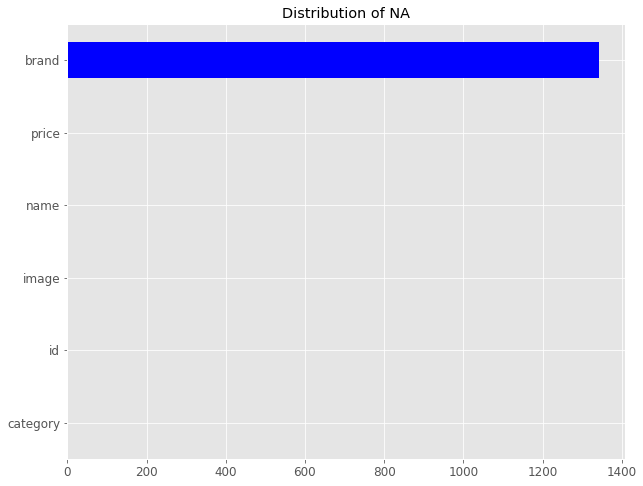

In [7]:
fig = plt.figure(figsize=(10, 8))
plt.title("Distribution of NA")
data.isna().sum().sort_values(ascending=True).plot(kind='barh',colors='Blue', fontsize=12)

Solo hay nulos en las marcas y unos 1200 que de 200mil representa un 0.4% por tanto no es muy preocupante, además seguramente la marca la acabemos incorporando dentro del texto final por tanto en caso de que no se conozca la marca no la ánadiremos al corpus de texto de ese producto

## Categoria

In [8]:
data_copy = data.copy()

In [9]:
for i, lista in enumerate(data_copy['category'].values):
    data_copy['category'].values[i] = ast.literal_eval(lista)
for i, elem in enumerate(data_copy['category']):
    data_copy['category'].values[i] = [x.replace(" ", "_") for x in elem ]

In [10]:
# Comentar para solo juntar los de cada lista
data_copy['category'] = data_copy['category'].apply(lambda x: '_'.join(x))

In [11]:
data_copy['category'][100050]

'Electrodomésticos_Aire_acondicionado_Split_Split_1_x_1'

Ahora ya podemos sacar cuantas Categorias distintas hay y cuales son las que mas aparecen

### Top Categorias

Tenemos una lista de valores en vez de tener un unico valor por tanto necesitaremos suar la libreria Counter e itertools

In [16]:
n_categorias = data_copy['category'].value_counts()
print (n_categorias[:10])
print (len(n_categorias))
print (len(n_categorias[n_categorias > 10 ]))
print (n_categorias[n_categorias > 10 ][-10:])

Moda_Joyería_y_Relojes_Relojes_Hombre           1843
Moda_Joyería_y_Relojes_Relojes_Mujer            1685
Moda_Mujer_Punto_y_Jerseys                      1437
Moda_Mujer_Camisetas                            1307
Moda                                            1287
Deportes_Ropa_deportiva                         1240
Moda_Accesorios_Bisutería_Pendientes            1225
Moda_Mujer_Camisas,_Blusas_y_Tops               1194
Moda_Joyería_y_Relojes_Joyería_Mujer_Anillos    1117
Moda_Hombre_Camisas                             1114
Name: category, dtype: int64
3671
1715
BriCor_Baño_Accesorios_de_Baño_Toalleros_pared_Hotel                              11
BriCor_Ferretería_Escaleras_de_uso_profesional                                    11
Perfumería_General_Tratamiento_Corporal_Reductores                                11
Electrodomésticos_Preparación_de_alimentos_Robots_de_cocina_Robots_mezcladores    11
Perfumería_Cuerpo_Mujer_Cuidados_Específicos_Pecho                                11
Moda_I

In [14]:
#categories = Counter(itertools.chain.from_iterable(data_copy['category'].values))
#categories.most_common()

Aqui tenemos un ejemplo parecido al de las Marcas, el objetivo es poner el texto de la Categoria en el Bag of Words de ese producto

#### Nos guardamos las categorias al igual que las marcas

In [17]:
subset = data_copy[['id', 'category']]
#subset = subset.groupby('category').apply(lambda x: x['id'].values.tolist()).reset_index(name='col')

In [19]:
subset.head()

,id,category
0,1060651400131,Moda_Mujer_Abrigos
1,1060651400180,Moda_Mujer_Abrigos
2,1051056400107,Moda_Mujer_Abrigos
3,1019350401147,Moda_Mujer_Abrigos
4,1019353400229,Moda_Mujer_Abrigos


In [20]:
subset.to_csv('Categorias.csv', sep = ';', index=False, encoding = 'UTF-8', index_label=False)

### Price

Se ha observado que el precio siempre esta en EUR y la cantidad no nos aporta ninguna info importante en este Proyecto, dados los datos que vamos a tener del cliente

In [21]:
data = data.drop(['price'], axis = 1)
data.head()

,brand,category,id,image,name
0,Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1060651400131,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00160651400131____1__516x640.jpg,Abrigo masculino con textura de mujer
1,Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1060651400180,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/06/00160651400180____1__516x640.jpg,Abrigo doble faz de mujer con cinturón a tono
2,Woman El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1051056400107,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00151056400115____1__516x640.jpg,Abrigo largo de antelina de mujer Woman El Corte Inglés
3,Lloyd's,"['Moda', 'Mujer', 'Abrigos']",1019350401147,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119350401147____3__516x640.jpg,Chaqueta térmica de mujer Lloyds con efecto cortavientos
4,Lloyd's,"['Moda', 'Mujer', 'Abrigos']",1019353400229,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119353400237____2__516x640.jpg,Parka 100% algodón de mujer Lloyds con capucha


In [22]:
data.loc[70000]

brand                                                                                 El Corte Inglés
category                                      ['Hogar', 'Menaje de mesa', 'Café y té', 'Tazas de té']
id                                                                                    001007227340655
image       http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201803/12/00107227340655____1__640x640.jpg
name                                                        Set de 2 tazas de té Buga El Corte Inglés
Name: 70000, dtype: object

## Imagenes

In [23]:
images = data[['id', 'image']]
images.head()

,id,image
0,1060651400131,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00160651400131____1__516x640.jpg
1,1060651400180,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/06/00160651400180____1__516x640.jpg
2,1051056400107,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00151056400115____1__516x640.jpg
3,1019350401147,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119350401147____3__516x640.jpg
4,1019353400229,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119353400237____2__516x640.jpg


In [24]:
images.to_csv('Imagenes.csv', sep = ';', index=False, encoding = 'UTF-8')

---